## 총점 및 순위 계산

### 1. 읽어들일 파일명 지정 ==> 가지고 있는 파일명으로 수정필요

In [1]:
########### file_name 선언 ##################################
전처리데이터셋 = '남양주_전처리데이터셋.csv'
##########################################################

### 2. 화면에 출력되는 칼럼명을 확인한 후, 필요한 칼럼명을 복사하여 붙여넣기 (수정 불필요)

In [2]:
import pandas as pd
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('gid', inplace=True)
전체칼럼 = df.columns.tolist()
print ("여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.\n", 전체칼럼)

여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.
 ['건물1', '건물2', '건물3', '관공서', '전기차', '주차장', '충전소', '변압기', '전기안전관리관', '교통량', '경제인구', 'lon', 'lat']


### 3. 하단에 있는 "점수칼럼"에 점수로 환산할 대상인 칼럼을 수정하도록 함 ==> 수정 필요

In [3]:
#점수칼럼 =  ['건물1', '건물2', '건물3', '관공서', '도서관', '경제인구', '교통량', '전기차', '관광지']
점수칼럼 =  ['건물1', '건물2', '건물3', '관공서', '경제인구', '전기차']
print("입력한 점수컬럼명은 다음과 같음\n", 점수칼럼)

가중치 = [1] * len(점수칼럼)

입력한 점수컬럼명은 다음과 같음
 ['건물1', '건물2', '건물3', '관공서', '경제인구', '전기차']


### 4. 건물 가중치 선언 ==> 필요시 수정
- 각 건물과 관광지에 대한 가중치를 수기로 선언함
- 필요시 가중치 조절 하십시오 
- 필요시 가중치 추가 또는 삭제 하십시오

In [5]:
#점수칼럼  순서대로 점수칼럼 갯수만큼 가중치를 입력하십시오

#예를들어 이렇게 가중치를 주고 싶을 경우에는
#건물1가중치=1
#건물2가중치 = 2
#건물3가중치  = 3
#관광지가중치=1
#도서관가충치=1
#경제인구가중치=1
#전기차가중치=1
#아래 처럼 입력합니다.

##### 여기만 수정하면 됩니다 ###############################
가중치 = [1,2,3,1,1,1]      # 점수칼럼 갯수 만큼, 구분은 쉼표
##### 여기만 수정하면 됩니다 ###############################


# 수정 불필요
if (len(가중치) != len(점수칼럼)):
    print("입력한 가중치 갯수가 점수칼럼 갯수와 다르므로 확인후 다시 입력 바랍니다")
else:
    print("다음 줄을 실행 하세요")

다음 줄을 실행 하세요


### 5. 이하 별도 언급 시까지 수정 불필요
- 6.1에서 수정 필요

In [6]:
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('gid', inplace=True)

################## QGIS에서 작업한 전처리 결과 CSV 읽기 ####################################################
pre_process_set = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
pre_process_set = pre_process_set.sort_values(by='gid')

# Null 이 있을 수 있는 칼럼은 Null을 0로 변경
pre_process_set.fillna(0, inplace=True)
##################  QGIS에서 작업한 전처리 결과 CSV 읽기 끝###################################################

################## MinMax정규화 ##########################################################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 점수칼럼 정규화
norm = pre_process_set.copy()
norm.fillna(0, inplace=True)
norm.set_index('gid', inplace=True)

norm[점수칼럼] = scaler.fit_transform(norm.loc[:,점수칼럼])
norm.reset_index(inplace=True)
################## 정규화 끝################################################################################


# 총점 계산
df = norm.copy()

for i in range(0, len(점수칼럼)):
    name = 점수칼럼[i]
    df[name] = df[name] * 가중치[i] 

df.set_index(['gid','주차장','lon','lat'], inplace=True)

df['sum'] = df.sum(1)
df.reset_index(inplace=True)

# 등수 계산 
df['순위'] = df['sum'].rank(method='dense', ascending=False).astype(int)

final = df.sort_values(by='순위')
final.reset_index(drop=True, inplace=True)

# 상위 20개만 학인
display("결과", final.head(20))

# 최종 결과 CSV 파일쓰기
final.to_csv('결과_총점.csv', index=False, sep=',', encoding='cp949')

'결과'

,gid,주차장,lon,lat,건물1,건물2,건물3,관공서,전기차,충전소,변압기,전기안전관리관,교통량,경제인구,sum,순위
0,다사70aa56bb,0,0,0,0.000000,2.000000,0.0,0.00,1.00,0,0,0,51,1.000000,55.000000,1
1,다사70aa57aa,0,0,0,0.026316,2.000000,0.0,0.00,0.75,0,0,0,51,0.767514,54.543830,2
2,다사69bb57aa,0,0,1,0.052632,1.607843,0.0,0.25,0.75,1,0,0,41,0.814631,45.475106,3
3,다사74aa54aa,1,0,0,0.039474,1.450980,0.0,0.00,0.50,0,0,0,37,0.596404,39.586858,4
4,다사69bb56bb,0,0,0,0.013158,1.176471,0.0,0.00,0.50,0,0,0,30,0.906386,32.596014,5
5,다사77aa61aa,0,0,0,0.078947,1.137255,0.0,0.00,0.25,0,0,0,29,0.480781,30.946983,6
6,다사77aa60bb,0,0,0,0.026316,1.019608,0.0,0.00,0.25,0,0,0,26,0.702418,27.998341,7
7,다사76bb60ba,0,0,0,0.039474,0.980392,0.0,0.00,1.00,0,0,0,25,0.862058,27.881924,8
8,다사76bb60bb,1,0,1,0.092105,0.941176,0.0,0.25,0.00,0,0,0,24,0.459082,25.742364,9
9,다사77bb61bb,0,0,2,0.184211,0.862745,0.5,0.50,0.25,0,0,0,22,0.368258,24.665214,10


## 6. 지도로 보기
- 인터넷 환경이 안되면 생략

### 6.1 지도로 보기 선택 사항
- 상단에서 도출된 결과값들 중에서 상위 3개만 지도로 보여주기
- Google Map 처럼 보여지며, 마우스로 스크롤하면 지도 크기가 Zoom 됨
- 이를 위해서 Anaconda Promprt 창을 열고 아래 함수를 복사하여 그대로 엔터
 - pip install folium

#### 수정 필요 - 수정 안하면 상위 20개를 조회

In [7]:
# 보고 싶은 상위권 갯수를 입력하세요
지도보기갯수 = 20   # 보고싶은 상위권 갯수를 여기에 입력, 만약 3이면 최상위 3개만 보겠다는 의미

### 6.2 수정 불필요

In [9]:
!pip install folium

In [10]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
for i in range(지도보기갯수):
    지도보기 = folium.Map(location=[final.loc[i,'lat'],final.loc[i,'lon']], zoom_start = 15)
    folium.Marker([final.loc[i,'lat'],final.loc[i,'lon']]).add_to(지도보기)
    print (final.loc[i,'lat'],final.loc[i,'lon'])
    j = i+1
    display(f'상위 {j}번째 격자의 센터 위치 보기', 지도보기)

보고자 하는 상위권 갯수는 20개 입니다.
0 0


'상위 1번째 격자의 센터 위치 보기'

0 0


'상위 2번째 격자의 센터 위치 보기'

1 0


'상위 3번째 격자의 센터 위치 보기'

0 0


'상위 4번째 격자의 센터 위치 보기'

0 0


'상위 5번째 격자의 센터 위치 보기'

0 0


'상위 6번째 격자의 센터 위치 보기'

0 0


'상위 7번째 격자의 센터 위치 보기'

0 0


'상위 8번째 격자의 센터 위치 보기'

1 0


'상위 9번째 격자의 센터 위치 보기'

2 0


'상위 10번째 격자의 센터 위치 보기'

1 0


'상위 11번째 격자의 센터 위치 보기'

0 0


'상위 12번째 격자의 센터 위치 보기'

0 0


'상위 13번째 격자의 센터 위치 보기'

0 0


'상위 14번째 격자의 센터 위치 보기'

0 0


'상위 15번째 격자의 센터 위치 보기'

0 0


'상위 16번째 격자의 센터 위치 보기'

1 0


'상위 17번째 격자의 센터 위치 보기'

0 0


'상위 18번째 격자의 센터 위치 보기'

0 0


'상위 19번째 격자의 센터 위치 보기'

0 0


'상위 20번째 격자의 센터 위치 보기'

### 6. Box Plot 보기 선택 사항 - 수정 불필요
- 상기 선택사항 실행여부와 무관하게 9번은 실행가능함
- 값들이 몇점대에 몰려 있는지 확인해보는 Box Plot 그래프
- 맨 하단부에 몰려 있을 가능성이 높음. 이유는 절반이상이 0점이기 때문

In [11]:
#참고) 총점 분포도
import matplotlib.pyplot as plt

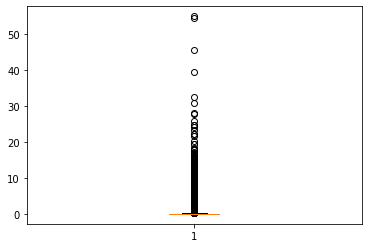

In [12]:
plt.figure()
plt.boxplot(final['sum'])
plt.show()

끝